# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import random
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
# set up lists to hold reponse info

city_list = []
lat_list = []
lng_list = []
temp_list = []
humidity_list =[]
cloudiness_list = []
wind_list = []
country_list = []
date_list = []

record_num = 0
set_num =1

print('Beginning Data Retrieval')
print('-------------------------------------')

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        temp_list.append(response['main']['temp_max'])                
        humidity_list.append(response['main']['humidity'])
        cloudiness_list.append(response['clouds']['all'])
        wind_list.append(response['wind']['speed'])
        country_list.append(response['sys']['country'])
        date_list.append(response['dt'])
        if record_num > 48:
            record_num = 1
            set_num += 1
            city_list.append(city)
        else:
            record_num += 1
            city_list.append(city)
        print(f"Processing Record {record_num} of Set {set_num} | {city}")
    except Exception:
        print("City not found. Skipping...")
print('-------------------------------------')
print('Data Retrieval Complete')
print('-------------------------------------')

Beginning Data Retrieval
-------------------------------------
Processing Record 1 of Set 1 | cockburn town
Processing Record 2 of Set 1 | quepos
Processing Record 3 of Set 1 | nanortalik
Processing Record 4 of Set 1 | codrington
Processing Record 5 of Set 1 | eisiskes
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | hobyo
Processing Record 8 of Set 1 | saskylakh
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | garowe
Processing Record 11 of Set 1 | chuy
Processing Record 12 of Set 1 | klaksvik
Processing Record 13 of Set 1 | taft
Processing Record 14 of Set 1 | dumas
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | grindavik
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | vinh
Processing Record 20 of Set 1 | geraldton
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | belaya gora
Processing Record 23 of Set 1 | kavieng
Processing R

Processing Record 42 of Set 4 | torzhok
Processing Record 43 of Set 4 | viedma
Processing Record 44 of Set 4 | bathsheba
Processing Record 45 of Set 4 | cabo san lucas
Processing Record 46 of Set 4 | mar del plata
Processing Record 47 of Set 4 | maryborough
Processing Record 48 of Set 4 | mandal
Processing Record 49 of Set 4 | margate
Processing Record 1 of Set 5 | namwala
Processing Record 2 of Set 5 | hofn
Processing Record 3 of Set 5 | bekovo
Processing Record 4 of Set 5 | saint-felix-de-valois
Processing Record 5 of Set 5 | boende
Processing Record 6 of Set 5 | sioux lookout
Processing Record 7 of Set 5 | pachino
Processing Record 8 of Set 5 | port blair
Processing Record 9 of Set 5 | saldanha
City not found. Skipping...
Processing Record 10 of Set 5 | filadelfia
Processing Record 11 of Set 5 | lundazi
Processing Record 12 of Set 5 | olafsvik
City not found. Skipping...
Processing Record 13 of Set 5 | tahara
Processing Record 14 of Set 5 | boddam
Processing Record 15 of Set 5 | eli

Processing Record 31 of Set 8 | tabas
City not found. Skipping...
Processing Record 32 of Set 8 | sitka
Processing Record 33 of Set 8 | otse
Processing Record 34 of Set 8 | asfi
Processing Record 35 of Set 8 | alugan
Processing Record 36 of Set 8 | tabuk
Processing Record 37 of Set 8 | okhotsk
Processing Record 38 of Set 8 | iqaluit
Processing Record 39 of Set 8 | pulaski
Processing Record 40 of Set 8 | atherton
Processing Record 41 of Set 8 | bonavista
Processing Record 42 of Set 8 | kindu
Processing Record 43 of Set 8 | bambari
Processing Record 44 of Set 8 | high level
Processing Record 45 of Set 8 | dunedin
Processing Record 46 of Set 8 | krasnoselkup
Processing Record 47 of Set 8 | wewak
Processing Record 48 of Set 8 | qaqortoq
Processing Record 49 of Set 8 | goure
Processing Record 1 of Set 9 | correia pinto
Processing Record 2 of Set 9 | yanam
Processing Record 3 of Set 9 | daan
Processing Record 4 of Set 9 | mimoso do sul
City not found. Skipping...
Processing Record 5 of Set 9

In [30]:
# for city in cities:
#     response = requests.get(query_url + city).json()
#     pprint(response)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
weather = {
    "City" : city_list,
    "Lat" : lat_list,
    "Lng" : lng_list,
    "Max Temp" : temp_list,
    "Humidity" : humidity_list,
    "Cloudiness" : cloudiness_list,
    "Wind Speed" : wind_list,
    "Country" : country_list,
    "Date" : date_list
}

In [34]:
print(len(city_list))
print(len(lat_list))
print(len(lng_list))
print(len(temp_list))
print(len(humidity_list))
print(len(cloudiness_list))
print(len(wind_list))
print(len(country_list))
print(len(date_list))

559
559
559
559
559
559
559
559
559


In [45]:
weather_df = pd.DataFrame(weather)
weather_df.to_csv('../output_data/weather_df.csv')

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cockburn town,21.4612,-71.1419,82.40,61,40,17.27,TC,1619716336
1,quepos,9.4236,-84.1652,75.20,73,75,5.75,CR,1619716402
2,nanortalik,60.1432,-45.2371,38.70,78,16,5.77,GL,1619716294
3,codrington,-38.2667,141.9667,53.24,91,22,5.50,AU,1619716402
4,eisiskes,54.1667,25.0000,55.99,47,0,5.75,LT,1619716403


In [46]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,19.095853,16.093731,63.525098,68.182469,57.803220,7.516261,1.619717e+09
std,33.322268,89.267036,20.210118,23.188467,35.937779,4.886309,1.454159e+02
min,-54.800000,-179.166700,-0.690000,2.000000,0.000000,0.130000,1.619716e+09
25%,-7.926250,-62.118350,49.495000,55.000000,21.500000,4.000000,1.619716e+09
50%,21.444700,23.127400,68.400000,73.000000,74.000000,6.580000,1.619717e+09
75%,47.680100,93.100000,78.800000,87.000000,90.000000,9.975000,1.619717e+09
max,78.218600,178.416700,106.860000,100.000000,100.000000,33.380000,1.619717e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

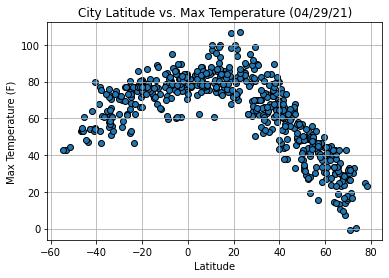

In [41]:
plt.scatter(weather_df['Lat'],weather_df['Max Temp'],edgecolors='black')


plt.title("City Latitude vs. Max Temperature (04/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Lat vs Temp fig (1)")

plt.show()

The graph shows that the closer to 0 latutude (The equator), the higher the temperature, and the farther away from the equator, the lower the temperature.

## Latitude vs. Humidity Plot

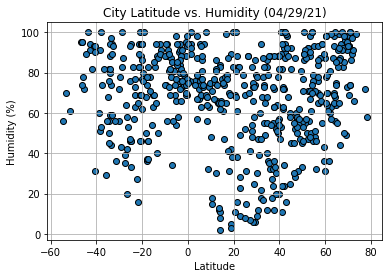

In [42]:
plt.scatter(weather_df['Lat'],weather_df['Humidity'],edgecolors='black')


plt.title("City Latitude vs. Humidity (04/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Lat vs Humidity (2)")

plt.show()

The graph shows that there is no relation between Latitude and Humidity.

## Latitude vs. Cloudiness Plot

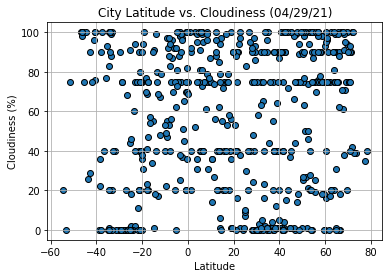

In [43]:
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'],edgecolors='black')


plt.title("City Latitude vs. Cloudiness (04/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Lat vs Cloudiness (3)")

plt.show()

The graph shows that there is no relation between Latitude and Cloudiness.

## Latitude vs. Wind Speed Plot

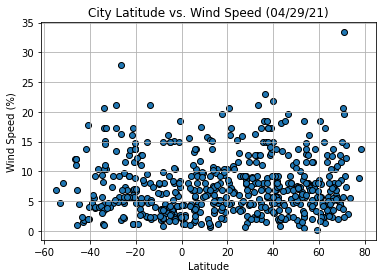

In [44]:
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'],edgecolors='black')


plt.title("City Latitude vs. Wind Speed (04/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Lat vs Wind (4)")

plt.show()

The graph shows that there is no relation between Latitude and Wind Speed.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


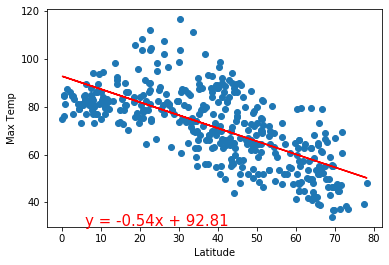

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


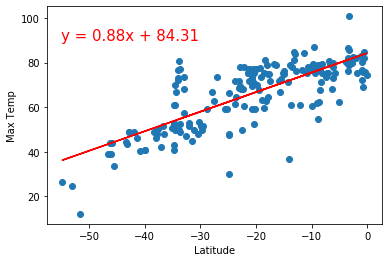

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


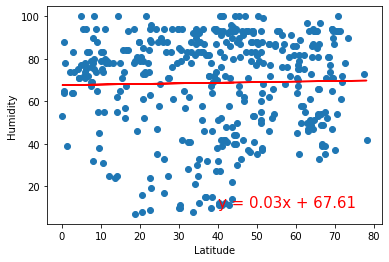

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


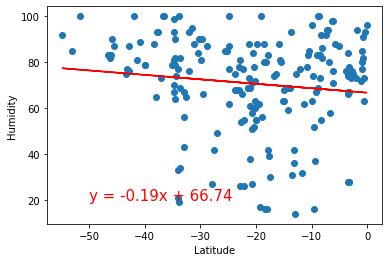

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


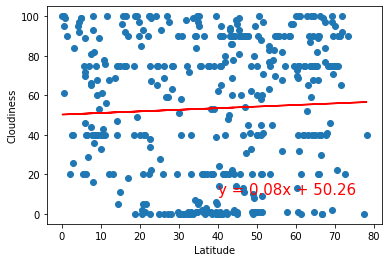

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


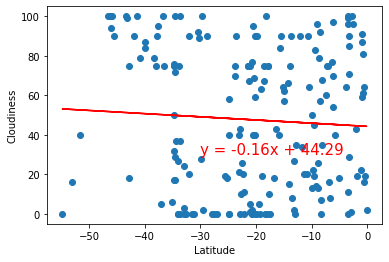

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


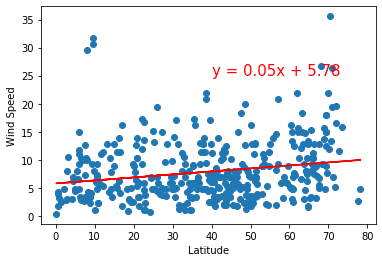

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


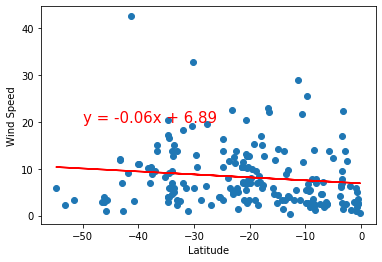